In [ ]:
%load_ext autoreload
%autoreload 2
from notebook import *
# if get something about NUMEXPR_MAX_THREADS being set incorrectly, don't worry.  It's not a problem.

<div class="namebox">    
Double Click to edit and enter your

1.  Name
2.  Student ID
3.  @ucr.edu email address
    
</div>

<div style=" font-size: 300% !important;
    margin-top: 1.5em;
    margin-bottom: 10px;
    font-weight: bold;
    line-height: 1.0;
    text-align:center;">
Assignment 3: Exploring Memory Hierarchy and Optimizing Programs!
</div>

In this assignment, you'll learn about the concepts of:

1.  Memory alignment
2.  Thinking in cache lines
3.  Working sets
4.  The cache hierarchy
5.  The impact of miss rate on performance
6.  The role of the TLB in determining performance 
7.  Spatial locality
8.  Temporal locality
9.  Cache-aware optimizations (Programming Assignment)

This assignment includes a programming assignment. 

Check the course schedule for due date(s).

We need to thank [Dr. Steven Swanson](https://cseweb.ucsd.edu/~swanson/) as a significant part of the assignment is orginated from Dr. Swanson's teaching materials.

# FAQ and Updates

* There are no updates, yet.

# Additional Reading

If you want to learn _a lot_ more about optimizing matrix multiply, try this paper:  https://www.cs.utexas.edu/~flame/pubs/GotoTOMS_revision.pdf

# Before You Do Anything Else

Save your current Notebook, and run this cell.  It'll fix your git repo history so you can successfully merge in updates

In [ ]:
!./fix-repo
!./pull-updates

## Keeping Your Assignment Up-to-Date

Occasionally, there will be changes made to the base repository after the
assignment is released.  This may include bug fixes and updates to this document.  We'll post on piazza when an update is available.

In those cases, you can use the following commands to pull the changes from upstream and merge them into your code.  You'll need to do this at a shell.  It won't work properly in the notebook.  Save your notebook in the browser first.


```
cd <your directory for this assignment>git remote add upstream $(cat .starter_repo)  # You need to do this once each time you checkout a new assignment. It will fail 
                                              # harmlessly if you run it more than once.
cp Assignment.ipynb Assignment.backup.ipynb                 # Backup your work.
git commit -am "My progress so far."          # commit your work.
git pull upstream main --allow-unrelated-histories -X theirs # pull the updates
```

Or you can use the script we provide:

```
./pull-updates
```


Then, reload this page in your browser.

## How To Use This Document

You will use Jupyter Notebook to complete this assignment.  You should be able to do much of this assignment without leaving Jupyter Notebook.  The main exception will be some of the programming assignments.  The instructions will make it clear when you should use the terminal.

### Running Code

Jupyter Notebooks are made up of "cells".  Some have Markdown-formatted text in them (like this one).  Some have Python code (like the one below).

For code cells, you press `shift-return` to execute the code.  Try it below:

In [ ]:
print("I'm in python")

Code cells can also execute shell commands using the `!` operator.  Try it below:

In [ ]:
!echo "I'm in a shell"

### Telling What The Notebook is Doing

The notebook will only run one cell at a time, so if you press `shift-return` several times, the cells will wait for one another.  You can tell that a cell is waiting if it there's a `*` in the `[]` to the left the cell:

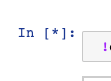


You'll can also tell _where_ the notebook is executing by looking at the table of contents on the left.  The section with the currently-executing cell will be red:

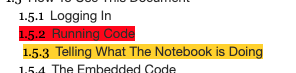

### What to Do Jupyter Notebook It Gets Stuck

First, check if it's actually stuck: Some of the cells take a while, but they will usually provide some visual sign of progress.  If _nothing_ is happening for more than 10 seconds, it's probably stuck.

To get it unstuck, you stop execution of the current cell with the "interrupt button":

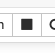

You can also restart the underlying python instance (i.e., the confusingly-named "kernel" which is not the same thing as the operating system kernel) with the restart button:

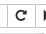

Once you do this, all the variables defined by earlier cells are gone, so you may get some errors.  You may need to re-run the cells in the current section to get things to work again.

You can also try reloading the web page.  That will leave Python kernel intact, but it can help with some problems.

### Common Errors and Non-Errors

1.  If you get `sh: 0: getcwd() failed: no such file or directory`, restart the kernel.
2.  If you get `INFO:MainThread:numexpr.utils:Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.`.  It's not a real error.  Ignore it. 
3.  Sometimes `cs203 run` will just sit there and seemingly do nothing.  Weirdly, interrupting the kernel (button above) seems to jolt it awake and cause it to continue.
4. If you get errors similar to `NameError: name 'render_csv' is not defined`, please re-execute the very beginning cell of this document.

### The Embedded Code

The code embedded in the assignment falls into two categories:

1.  Code you need to edit and understand.
2.  Code that you do not need to edit or understand -- it's just there to display something for you.

For code in the first category, the assignment will make it clear that you need to study, modify, and/or run the code.  If we don't explicitly ask you to do something, you don't need to.

Most of the code in the second category is for drawing graphs.  You can just run it with shift-return to the see the results.  If you are curious, it's mostly written with `Pandas` and `matplotlib`. The code is all in `notebook.py`.   These cells should be un-editable.  However, if you want to experiment with them, you can copy _the contents_ of the cell into a new cell and do whatever you want (If you copy the cell, the copy will also be uneditable).

<div class="alert alert-block alert-info">

**Most Cells are Immutable** Many of the cells of this notebook are uneditable. The only ones you should edit are some of the code cells and the text cells with questions in them.
</div>

### Answering Questions

Throughout this document, you'll see some questions (like the one below).  You can double click on them to edit them and fill in your answer.  Try not to mess up the formatting (so it's easy for us to grade), but at least make sure your answer shows up clearly.  When you are done editing, you can `shift-return` to make it pretty again.

A few tips, pointers, and caveats for answering questions:

1. The answers are all in [github-flavored markdown](https://guides.github.com/features/mastering-markdown/) with some html sprinkled in.  Leave the html alone.
2. Many answers require you to fill in a table, and many of the `|` characters will be missing.  You'll need to add them back.
3. The HTML needs to start at the beginning of a line.  If there are spaces before a tag, it won't render properly.  If you accidentally add white space at the beginning of a line with an html tag on it, you'll need to fix it.
4. Text answers also need to start at the beginning of a line, otherwise they will be rendered as code.
5. Press `shift-return` or `option-return` to render the cell and make sure it looks good.
6. There needs to be a blank line between html tags and markdown.  Otherwise, the markdown formatting will not appear correctly.


You'll notice that there are three kinds of questions: "Correctness", "Completeness", and "Optional".  You need to provide an answer to the "Completeness" questions, but you won't be graded on its correctness.  You'll need to answer "Correctness" questions correctly to get credit.  The "Optional" questions are optional.

## Grading

Your grade for this assignment will be based on the following components

| Part                       | value |
|----------------------------|-------|
| Jupyter Notebook           | 50%   |
| Programming Assignment     | 48%   |
| Post-assignment survey.           | 2%    |

No late work or extensions will be allowed.

We will grade 5 of the "completeness" problems.  We will grade all of the "correctness" questions.

You'll follow the directions at the end of the assignment to submit the assignment write up and the programming assignment through gradescope. 

Please check gradescope for exact due dates.

# Meeting Our Processor Again

In this assignment, we again use the Intel Core i3-12100F "Alder Lake" processor that you've been used before. Now, as you have more knowledge about computer architectures, let's take a look of the processor detail again and see if you have different feelings.

In [ ]:
! cs203 run 'lscpu'

As we learned in the lectures, the cache configuration determines the performance of executing code. Knowing the cache configurations and the parameters -- $A, B, C, S$ would help us to better predict how memory accesses will behave when executing code. The following command will help us getting these important cache configurations and parameters on the bare metal cloud machine. 

In [ ]:
!cs203 run ' getconf -a | grep CACHE'

<div class="alert alert-block alert-success"><div class="question correctness">

### Question 1 (Correctness)

<div class="question-text">

Reading the output from the above command, let's focus on "LEVEL1_D", namely, the L1 data cache configuration first. Remember the $C=ABS$ equation we taught in class, can you try to answer the following questions? 
</div>
    
<div class="answer">

| Cache Parameter  | Value |
| ---------------- | -----|
|               C  |       |
|               A  |       |
|               B  |       |
|               S  |       |
| # of offset bits |       |
| # of index bits  |       |
    
    
</div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">
You answers:


| Cache Parameter  | Value |
| ---------------- | ----- |
|               C  |       |
|               A  |       |
|               B  |       |
|               S  |       |
| # of offset bits |       |
| # of index bits  |       |

    
$ Show\ your\ work\ here $

</div>
</div>

# When will a program access "data memory"

In the von Neumann architecture, a program can access memory when (1) fetching instructions, technically, every instruction, and (2) accessing (read/write) data upon a request from an instruction. To predict and optimize the effect of memory access in our code, understanding and predicting the pattern of memory accesses is important. Since instruction memory access occurs every instruction and typically has strong localities, we focus more on the data memory access part, that is less regular, in this assignment. 

Let's take a look of the following `array` function.


In [ ]:
array = build(code(r"""

#include<cstdint>
#include<cstdlib>

extern "C" 
uint64_t* array(uint64_t * data, uint64_t size, uint64_t arg1) {
    uint64_t sum=0;
    for(uint x = 0; x < size; x++) {
        sum+=data[x];
    }

    data[0] = sum;
    return data;
}

"""),build_parameters=arg_map(OPTIMIZE=["-mno-avx -O0","-mno-avx -O1"]))

compare([array[0].asm("array"), array[1].asm("array")],
        ["-mno-avx -O0","-mno-avx -O1"])

<div class="alert alert-block alert-success"><div class="question correctness">

### Question 2 (Correctness)

<div class="question-text">

Investigating the two versions, unoptimized (i.e., -O0) and optimized (i.e., -O1)of the compiled code, please identify where the code stores the variables `x` and `size`, and which instruction accesses `data[x]`. 
</div>

</div>
</div>

<div class="alert alert-block alert-success">
    
<div class="answer">

Answer: 

| Question                                 | Unoptimized        | Optimized |
| ---------------------------------------- | ------------------ | --------- |
| 1. Where does the code store `x`?        |                    |                   |
| 2. Where does the code store `size`?     |                    |                   |
| 3. Where does the code access `data[x]`? |                    |                   |
    
Please explain:

</div>
</div>

### Register assignment

As memory accesses are slow (still true now!) compared to the processor speed, an essential compiler optimization is _register assignment_.  Register assignment takes local variables and intermediate values and stores them in register rather than on the static.  This saves `mov` instructions and memory accesses.  Looking at the above two versions of compiled `array` function, where the code on the left is unoptimized and the code on the right is optimized. You should notice a few things.

1. First, the "base pointer" is in `%rbp`.  This is the base of the stack frame for this function call.  Local variables typically live on the stack and are accessed relative to the base pointer.

2. In x86, the first two function arguments are passed in `%rdi`, `%rsi` and `%rdx`.  Return values are stored in `%rax`.

3. In unoptimized code, `sum` and `x` are on the stack at locations `-8(%rbp)` and `-12(%rbp)`, respectively.  In fact, the compiler goes through the trouble of storing `%edi` and `%esi` into `(%rbp)` and `-8(%rbp)`.  

4. _immediately_ uses `movl` to load `x` back into the `%eax/%rax` before the `cmpq` instruction loads `size` from the stack, and compare the value in `%rax` with the loaded value, and storing the result in a flag. 

In constrast, the optimized code avoids all that nonsense memory accesses with the stack.  It just initialize the value of `x` in `%rdx` using the `movl` instruction near `LBB3:`, making the argument in `%rsi` (where we pass `size` from) remain unchanged throughout the function, and compare it with `%rdx`.

<div class="alert alert-block alert-info">

**Pro Tip: Identifying unoptimized assembly** Register assignment is one of the most basic optimizations that compilers preform and the difference between the optimized and unoptimized versions is starkly obvious.  This means that you can usually just tell by looking at assembly code whether it was compiled with optimizations enabled: if it has lots of parentheses (on instructions other than `lea`) it's probably not optimized.
    
</div>

You can also encourage the compiler to put a variable into a register with the `register` keyword.  This is not a good practice in real code since modern compilers do register assignment automatically.  We'll use this trick in some of our examples to highlight the impact of individual optimizations.  

<div class="alert alert-block alert-info">

**Take-away:** Since register assignment is one of the most basic optimizations that compilers preform, you should assume people will compile code with this optimization turned on. Starting now, in this assignment as well as the rest quarter of CS203, you should also assume register assignment is always turned on. The general guideline here is, typically, as long as the function does not use too many local variables and loop indexes (an x86 processor has 16 registers now, so let's say fewer than 8 of those), you should assume local variables, loop indexes, and base addresses of pointers/data structures should just occupy registers instead of stack memory locations.
</div>

# Predicting and measuring the memory access performance

As you learned in CS203, the DRAM-based main memory is way slower than the processor speed. Therefore, it's important for the programmers to know how their code can benefit from caches. In this section, we will practice the prediction techniques you learned from CS203 and match it with real measurements.

## Predicting cache miss rates

Let's go back to the `array` function back again and assume register assignment is turned on.

<div class="alert alert-block alert-success"><div class="question correctness">

### Question 3 (Correctness)

<div class="question-text">

Given the cache configuration we've learned in Question 1. If `size == 8192`, how many total L1 data cache misses do think will occur during the execution of `array()`? Assume the cache is empty to begin and you may assume the `data` address starts with something like 0x40000 as we did in the lecture. 

</div>

**Start with filling the table with the first 16 memory accesses**

| data[?] | address | tag  | index | offset | hit or miss |
| ------- | ------- | ---- | ----- | ------ | ----------- |
| data[0] | 0x40000 | 0x40 |   0x0 |    0x0 | miss        |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |

**What's the estimate cache miss rate? Please explain. You may find LaTeX formula syntax useful.**

</div>
</div>

<div class="alert alert-block alert-success">
    
<div class="answer">
    
Answer:
    
**How many data memory accesses in total?**

**Start with filling the table with the first 16 memory accesses**

| data[?] | address | tag  | index | offset | hit or miss |
| ------- | ------- | ---- | ----- | ------ | ----------- |
| data[0] | 0x40000 | 0x40 |   0x0 |    0x0 | miss        |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |
|         |         |      |       |        |             |


**What's the estimate cache miss rate? Please explain. You may find LaTeX formula syntax useful.**

$Show\ your\ work\ here$

</div>
</div>

## Measuring Cache Performance with Performance Counters

We'll use performance counters to measure cache performance on our bare metal machines in the cloud.  We'll use the same tools we've used so far to measure `IC`, `CPI`, and `CT`.

Let's measure the cache behavior of `array` from the example above. Please run the following cell:

In [ ]:
t = fiddle("array.cpp", function="array", opt="-O1", cmdline=r"",
code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* array(uint64_t * data, uint64_t size, uint64_t arg1) {
    uint64_t sum=0;
    for(uint x = 0; x < size; x++) {
        sum+=data[x];
    }

    data[0] = sum;
    return data;
}

FUNCTION(one_array_1arg, array);
""")

!rm -f build/array.so; make MICROBENCH_OPTIMIZE="-mno-avx -O1" ./build/array.so fiddle.exe
!cs203 run "./fiddle.exe -l ./build/array.so -f array -s 8192 -M 3300 -o array.csv"

<div class="alert alert-block alert-info">
Run the cell below to see the measurements.
<div>

Now, let's show the result in a table. 

In [ ]:
display_mono(render_csv("array.csv", columns=["function","size", "IC", "CPI", "CT","ET", "L1_dcache_miss_rate", "L1_dcache_misses", "L1_dcache_accesses"]))

<div class="alert alert-block alert-info">
    
The `L1_cache_misses` column has the number of L1 cache misses.  `L1_dcache_miss_rate` is the ratio of cache misses per memory access.

As you can see our estimate is very good for large array sizes.   For smaller sizes, the actual number is higher due to extra instruction executed before and after `array`.
</div>

## Measuring Cache Latency and Bandwidth

Caches reduce latency and increase bandwidth.  Let's  refresh our memory about the machine we are running on and see how large this effect is.

### The Caches we Have

Run the cell below remind yourself how large our L1, L2, and L3 caches are.

In [ ]:
!cs203 run 'getconf -a | grep CACHE'

### Cache Latency

We will use a different tool to measure cache latency.  This one is called `lat_read_rd` and it's part of set of system benchmarks called [`lmbench`](http://lmbench.sourceforge.net/).  `lat_mem_rd` measures the latency for repetitive accesses large and larger arrays.  For arrays that fit in the L1 cache, the average latency of these accesses is the L1 cache latency.  For arrays bigger than the L1 but that fit in the L2, it's the L2 cache latency.  Likewise, for L3.

<div class="alert alert-block alert-success"><div class="question optional">

### Question 4 (Optional)
<div class="question-text">

How would you implement `lat_mem_rd`?
    
</div>
</div>
</div>

<div class="alert alert-block alert-success">
    
<div class="answer">
Answer:
    
How would you implement `lat_mem_rd`?
    
</div>
</div>

<div class="alert alert-block alert-info">
    
Helpully, the man page will tell you:
</div>

In [ ]:
!cs203 run "man lat_mem_rd"

<div class="alert alert-block alert-info">

Sound familiar?
    
</div>

Recall from the previous section that our processor has a 48 KB L1, a 1.5MB L2, and a 12MB L3.  Usually, I'd have you run `lat_mem_rd` but it takes a long time to run and the output format is annoying, so here are the results:

In [ ]:
df = render_csv("lat_mem_rd.csv")
df["size_bytes"] = df["size_MB"]*1024*1024
plotPE(df=df, what=[("size_bytes", "latency_ns")], lines=True, logx=2, logy=2, log_autoscale_x=False, log_autoscale_y=False)
display_mono(df)

The "stair step" pattern you see is the jump in latency as data accesses start being served out of the slower and slower, layers of the memory hierarchy.   The steps occur roughly we expect them to:  48KB (L1 to L2), 1280KB (L2 to L3), and 12MB (L3 to DRAM).  For larger sizes things get noisier so the "steps" aren't as crisp.

<div class="alert alert-block alert-success"><div class="question correctness points-4">

### Question 5 (Correctness)

<div class="question-text">

Based on this graph, give the latencies for each of the caches.
</div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">

| Level of the memory hierarchy | latency (ns) |  latency (Cycles) |  
| ------------------------------|---------|-| 
| L1  | |   |
| L2 | |  |
| L3 | |  |
| Main memory | | |
    
</div>
    
</div>

## Cache Bandwidth

We don't have a handy tool for measuring cache bandwidth.  Maybe we'll build one as a future programming lab...

We do however, have some technical details about about processor, so we can calculate what the peak (maximum attainable) cache bandwidth should be.

Intel's Alder Lake processors (of which our CPU is an example) [More Info] (https://www.intel.com/content/www/us/en/products/sku/132223/intel-core-i312100f-processor-12m-cache-up-to-4-30-ghz/specifications.html) can execute up to 2 64-byte loads and up to 64-byte store per cycle.  At 3.3GHz, this works out to `2*64*3.3e9 = 422.4GB/s` for loads and `2*64*3.3e9 = 422.4GB/s` for stores for a total 844.8GB/s.

The L2 cache provide one 64-bytes load _or_ store per cycle for `64*3.3e9=211.2GB/s.`

I don't have any information about the L3. 

## Are the Caches Fast?

They are certainly better than DRAM -- the L1's latency is `13.75/1.166 = 11.79` times lower than DRAM, and bandwidth (in our system with two channels of DRAM) is `844.8/25.6 = 33` times higher.  Not only that, remember that we have 4 cores, so the total L1 cache bandwidth is `844.8GB/s * 4 ~ 3.4TB/s`.

However, the minimum load latency -- $\lceil \frac{1.166}{\frac{1}{3.3\times 10^9}} \rceil = 4$ cycles -- is still pretty high, considering that it's 4 times longer than the latency for a simple integer arithmetic operation (add, sub, etc.).  That means that having lots of load instructions can have a significant impact on CPI.

Caches are also slow compared to the register file. The register file latency is a little hard to quantify in a way that is comparable to cache latency, but 1/2 a cycle is a reasonable approximation. The register file is also quite large:  The total size is about 1kB.   It's reasonable to think of the register file a software-managed, "L0" cache.

# Thinking in Cache Lines

One of the central issues in cache-aware programming (i.e., crafting your code to make efficient use of the memory hierarchy) is understanding "how much" memory your program (or part of it) is using and "how big" a particular data structure (e.g., an array) is, and how often your program accesses memory.  It turns out there are a surprising number of ways to measure these things and the answers can be unexpectedly surprising and non-intuitive.  Not only that, the most obvious ways to measure these characteristics are not the most useful if you're interested in fully-utilizing your memory system.

So let's take a look at three questions and see how to answer them in a cache-aware way.

## How big is my data structure?

### Primitive Types

Let's start simple:  How many bytes do each of the primitive C++ data types occupy?  Here's some code to check.  It uses C's `sizeof` operator (it's not technically a function.  Why?) that tells you how many bytes something occupies.  The types listed are all the C++ primitive types.

In [ ]:
t = fiddle("primitive_sizes.cpp", function="primitive_sizes",
code=r"""
#include<cstdint>
#include<iostream>
#include"function_map.hpp"

extern "C"
uint64_t* primitive_sizes(uint64_t * data, uint64_t size, uint64_t arg1) {
    std::cout << "\n";
    std::cout << "sizeof(char) = " << sizeof(char) << "\n";
    std::cout << "sizeof(short int) = " << sizeof(short int) << "\n";
    std::cout << "sizeof(int) = " << sizeof(int) << "\n";
    std::cout << "sizeof(long int) = " << sizeof(long int) << "\n";
    std::cout << "sizeof(long long int) = " << sizeof(long long int) << "\n";
    std::cout << "sizeof(float) = " << sizeof(float) << "\n";
    std::cout << "sizeof(double) = " << sizeof(double) << "\n";
    std::cout << "sizeof(long double) = " << sizeof(long double) << "\n";
    std::cout << "sizeof(int8_t) = " << sizeof(int8_t) << "\n";
    std::cout << "sizeof(int16_t) = " << sizeof(int16_t) << "\n";
    std::cout << "sizeof(int32_t) = " << sizeof(uint32_t) << "\n";
    std::cout << "sizeof(int64_t) = " << sizeof(int64_t) << "\n";
    std::cout << "sizeof(int64_t*) = " << sizeof(int64_t*) << "\n";
    std::cout << "sizeof(void*) = " << sizeof(void*) << "\n";
    return data;
}

FUNCTION(one_array_1arg, primitive_sizes);
""")
!make build/primitive_sizes.so C_OPTS='-O1' fiddle.exe
!cs203 run './fiddle.exe -l build/primitive_sizes.so -f primitive_sizes'

The types with a number in their names (like `uint64_t`) let you specify specific sizes (in bits) you'd like to use.  They are defined in the `cstdint` header.  The [C/C++ standard](https://en.wikipedia.org/wiki/C_data_types) doesn't give specific sizes for 'int', 'long int', etc.  Instead, it places some constraints on what possible values might be.  This is a design "bug" in the languages.  I don't know of any other modern languages that leave the bit widths of primitive types unspecified.  One reason is that it hurts portability.  The other, is that it makes cache-aware programming harder (as we shall see).

### Structs

Let's try something more complicated.  Look at the code below and answer this question.  Then, run the code:

<div class="alert alert-block alert-success"><div class="question completeness"> 

### Question 6 (Completeness)

<div class="question-text">

Predict how many bytes of the structs below will occupy.
    
</div>
   
<div class="answer">

| struct | sizeof() |
|--------|----------|
| `struct_1` |     | 
| `struct_2` |     | 
| `struct_3` |     | 
| `struct_4` |     | 
| `struct_5` |     | 
| `struct_6` |     | 
| `struct_7` |     | 
| `struct_8` |     | 
    
</div>
</div>
</div>

<div class="alert alert-block alert-success">    
<div class="answer">

| struct | sizeof() |
|--------|----------|
| `struct_1` |     | 
| `struct_2` |     | 
| `struct_3` |     | 
| `struct_4` |     | 
| `struct_5` |     | 
| `struct_6` |     | 
| `struct_7` |     | 
| `struct_8` |     | 
    
</div>
</div>

In [ ]:
t = fiddle("struct1.cpp", function="struct_size",
code=r"""
#include<cstdint>
#include<iostream>
#include"function_map.hpp"

struct struct_1 {
    uint32_t a;
};

struct struct_2 {
    uint32_t a;
    uint32_t b;
};

struct struct_3 {
    uint32_t a;
    uint8_t b;
};

struct struct_4 {
    uint64_t a;
    uint8_t b;
};

struct struct_5 {
    uint8_t a;
    uint8_t b;
};

struct struct_6 {
    uint64_t a;
    uint8_t b;
} ;

struct struct_7 {
    uint64_t a;
    uint8_t b;
    uint8_t c;
} ;

struct struct_8 {
    uint8_t a;
    uint64_t b;
    uint8_t c;
} ;


extern "C"
uint64_t* struct_size(uint64_t * data, uint64_t size, uint64_t arg1) {
    std::cout << "\n";
    std::cout << "sizeof(struct_1) = " << sizeof(struct_1) << "\n";
    std::cout << "sizeof(struct_2) = " << sizeof(struct_2) << "\n";
    std::cout << "sizeof(struct_3) = " << sizeof(struct_3) << "\n";
    std::cout << "sizeof(struct_4) = " << sizeof(struct_4) << "\n";
    std::cout << "sizeof(struct_5) = " << sizeof(struct_5) << "\n";
    std::cout << "sizeof(struct_6) = " << sizeof(struct_6) << "\n";
    std::cout << "sizeof(struct_7) = " << sizeof(struct_7) << "\n";
    std::cout << "sizeof(struct_8) = " << sizeof(struct_8) << "\n";
    return data;
}

FUNCTION(one_array_1arg, struct_size);
""")
!make build/struct1.so C_OPTS='-O1' fiddle.exe
!cs203 run './fiddle.exe -l ./build/struct1.so -f struct_size'

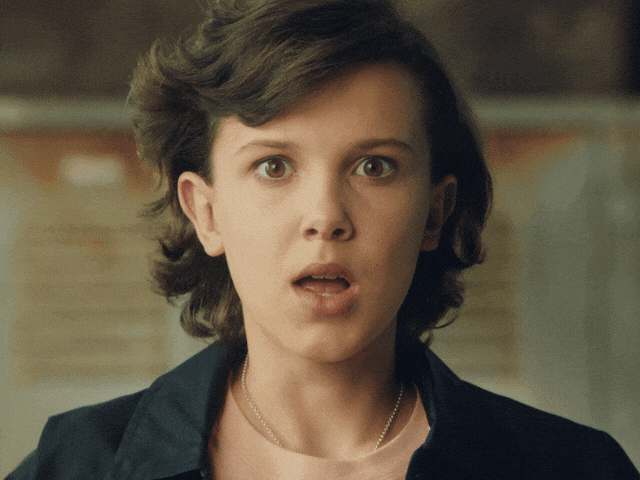

What's going on?!?!

What's going on is _data alignment_.  If a memory address, $A$, is $n$-byte aligned, then $A\mod{} n = 0$.  A particular value is "width-aligned" if it is aligned to its own size in bytes.  So, a width-aligned `uint64_t` would reside at an address that is a multiple of 8 bytes.

In most architecture, width-aligned access is faster than non-width-aligned access.  In some architectures, the ISA does not directly support non-width-aligned access (i.e., you can't load a 64-bit value from an address that is not a multiple of 8), because it requires extra hardware and complexity (e.g., if the architecture allows unaligned, multi-byte values, then a single load can access _two_ cache lines instead of one).  Instead, they require the compiler to implement these accesses with loads and shifts.

The strangeness in the outputs of the `sizeof` is a product of this.  The C/C++ standards require that the members of a struct be stored _in the order they are declared_.  Modern compilers "pad" members of the struct to enforce width-alginment.  For this purpose, it's assumed that the struct starts address 0.

For example, consider `struct_8` above.  It's laid out like so:

|Byte| | 
|----|-|
|0 |`a`|
|1 | unused |
|2 | unused|
|3 | unused|
|4 | unused|
|5 | unused|
|6 | unused|
|7 | unused|
|8 | `b`|
|9 | `b`|
|10 | `b`|
|11 | `b` |
|12 |`b` |
|13 | `b`|
|14 | `b`|
|15 | `b`|
|16 | `c`|
|17 | unused|
|18 | unused|
|19 | unused|
|20 | unused|
|21 | unused|
|22 | unused|
|23 | unused|

If this seems inefficient... it is.  Or at least, it's a trade-off.  It's better for performance this way and memory is plentiful.  Really, though, the programmer should re-order the fields of the struct to allow for a more efficient layout.  See if you can re-arrange the fields in `struct_8` to make it fit in 16 bytes.

### Arrays

Compared to structs, arrays are pretty well-behaved.  The size of an array is just the number of elements in the array multiplied by the size of the struct:

In [ ]:
t = fiddle("struct1.cpp", function="struct_size",
code=r"""
#include<cstdint>
#include<iostream>
#include"function_map.hpp"

struct struct_8 {
    uint8_t b;
    uint64_t a;
    uint8_t c;
} ;


extern "C"
uint64_t* struct_size(uint64_t * data, uint64_t size, uint64_t arg1) {
    struct struct_8 _8[3];
    std::cout << "\n";
    std::cout << "sizeof(struct_8[3]) = " << sizeof(_8) << "\n";
    return data;
}

FUNCTION(one_array_1arg, struct_size);
""")
!make build/struct1.so C_OPTS='-O1' fiddle.exe
!cs203 run './fiddle.exe -l build/struct1.so -f struct_size'

## How much memory does my code access?

Above, we measured the size of a data structure or array in bytes, and this makes sense for thinking about its size.

A related question is how much data does my program access.  If you are interested in writing code that is cache-aware, thinking of data measured in bytes is not that useful.  A better choice is to think about data measured in cache lines, because cache lines are the units of memory that the memory hierarchy transfers between caches.

So what is one cache line of memory?  The seemingly obvious answer is that is the number of bytes that a cache line holds.  If that were the case, we could just divide the size of a structure by the cache line size.  But there is more to it:  Cache lines are  width-aligned.  That means that each cache line of memory starts at an address that is divisible by the cache line's size.  This means that the number of cache lines a struct occupies _depends on its alignment_.

For example, let's assume our cache line size is 16 bytes, and `my_struct` is 16 bytes long.  Here are two possible scenarios for `my_struct`.   In the first, the beginning of `my_struct` is aligned to a cache line boundary, and `my_struct` occupies 1 cache line.

<table style="font-family:monospace">
    <tr>
    <td>byte</td><td>00</td><td>01</td><td>02</td><td>03</td><td>04</td><td>05</td><td>06</td><td>07</td><td>08</td><td>09</td><td>10</td><td>11</td><td>12</td><td>13</td><td>14</td><td>15</td><td>16</td><td>17</td><td>18</td><td>19</td><td>20</td><td>21</td><td>22</td><td>23</td><td>24</td><td>25</td><td>26</td><td>27</td><td>28</td><td>29</td><td>30</td><td>31</td>
    </tr>

<tr>
        <td>cache line</td><td style="text-align: center" colspan=16>0</td><td style="text-align: center" colspan=16>1</td>
    </tr>
    <tr><td></td><td style="text-align: center"  colspan=16>my_struct</td><td colspan=16></td></tr>
</table>
       
In the second scenario, `my_struct` is not aligned, and it occupies two cache lines:       

<table style="font-family:monospace">
    <tr>
    <td>byte</td><td>00</td><td>01</td><td>02</td><td>03</td><td>04</td><td>05</td><td>06</td><td>07</td><td>08</td><td>09</td><td>10</td><td>11</td><td>12</td><td>13</td><td>14</td><td>15</td><td>16</td><td>17</td><td>18</td><td>19</td><td>20</td><td>21</td><td>22</td><td>23</td><td>24</td><td>25</td><td>26</td><td>27</td><td>28</td><td>29</td><td>30</td><td>31</td>
    </tr>

<tr>
        <td>cache line</td><td style="text-align: center" colspan=16>0</td><td style="text-align: center" colspan=16>1</td>
    </tr>
    <tr><td></td><td colspan=4><td style="text-align: center"  colspan=16>my_struct</td><td colspan=12></td></tr>
</table>

This means that if we access the whole struct, we will incur one compulsory cache miss.   But in the second situation we will have two.


## Language Support

The experiments above show that alignment and struct layout can affect the performance of toy programs, but do these kinds of details really make any difference in real code?  They do!

How can we tell?  Two ways:

1.  We could go and write some high-performance systems and watch as alignment-related performance problems appear. 
2.  We can look at the tools that languages provides to deal with these issues.

#1 is lots of fun and I recommend it, but it takes a long time and we only have one quarter.  But there are three programming assignments left...

Let's look at #2.  For a long time, compiler writers and language designers have realized that memory layout and alignment is important, so they have provided support in the language to help programmers deal with this.

### Struct Initialization In C

Since the early versions of C, you can initialized a struct like this:

```C

struct Foo {
    char a;
    int b;
    char c;
};

Foo foo = {7,4,3};
```

Which will set `foo.a = 7`, `foo.b = 4`, and `foo.c = 3`.  We'll call this "positional initialization" or PI.  I think PI is super-unreadable, but it has an even bigger problem:  If you change the layout of `Foo` to improve it's cache efficiency, you have to update every static initialization of a `Foo` and there's no way for the compiler to tell if you missed one.  So the C99 standard gave us the "designated initialized":

```
Foo foo = {.a = 7, .b=4, .c=3};
```

This features appears as a gcc extension before it showed up in the C standard, and it's main use case was making easier to adjust struct layouts for memory-efficiency reasons.  For instance, in the unaligned access example above, we could move `Foo.c` to be near `Foo.a` and reduce the effects of poor alignment.

### C++ Object Alignment

Usually, the compiler can do a good job of aligning your structs, but there are cases where the programmer needs to force a structure to be aligned to a particular size.  The old fashioned way to do this was by wrapping `malloc()` (the C version of `new`) to create a new memory allocation function that could return memory at the desired alignment.  Writing such a function is a moderately interesting programming exercise.

Since 2001, C has had support for aligned allocation through `posix_memalign()`.

C++ has a more elegant solution and allows you to annotate the type with its alignment requirement using `alignas()`:

```C++

struct alignas(32) Foo {
    char a;
    int b;
    char c;
};
```

Which guarantees that all instance of `Foo` will be so aligned to 32 bytes.

For both `posix_memalign()` and `alignas()`, the alignment value must be a power of 2.  Other alignments are not generally useful.

# Locality In Space and Time

Caches improve program performance by exploiting the fact that memory accesses are not random: Programs access memory in patterns and there is a lot of repetition in what programs do and a lot of similarity how programs behave at different times.  This is not surprising since, programs are written languages with constructs like loops and function calls:  These constructs naturally give rise to patterns because they cause the same code to execute repeatedly.


## Spatial Locality

As you should recall from lecture, _spatial locality_ is a property of a program (or part of a program) where it accesses memory locations nearby locations it has accessed recently.  Let's see how spatial locality can affect performance.

Here's a simple test program that accesses a 1-dimensional tensor at different "strides".  The "stride" of a sequence of accesses is just the distance between consecutive accesses.  So, "stride 1" means accessing each element, and "stride 2" means accessing every other element.  The outer loop ensures ensures that the total number of accesses the loop perform remains the same, regardless of stride size).

Examine the code below, and then answer these question:

In [ ]:
t = fiddle("stride.cpp", function="stride", name="spatial", opt="-O1",
code=r"""
#include"function_map.hpp"
#include<cstdint>


extern "C"
uint64_t* stride(uint64_t * data, uint64_t size, uint64_t arg1) {
    uint64_t sum=0;
    for(uint i = 0; i < arg1; i++) {
        for(uint x = 0; x < size; x+=arg1) {
            sum+=data[x];
        }
    }
    data[0] = sum;
    return data;
}

FUNCTION(one_array_1arg, stride);
""")

<div class="alert alert-block alert-success"><div class="question correctness">

### Question 7 (Correctness)

<div class="question-text">
How many L1 D-cache misses would you expect for `stride == 1`?  How about `stride == 8` and `stride == 16`?  Assume `size` is very large and that cache lines are 64 bytes. 
</div>
<div class="answer">

**`stride == 1` L1 D-Misses:** 

**`stride == 8` L1 D-Misses:**
    
**`stride == 16` L1 D-Misses:** 

</div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">
    
Answer:

**`stride == 1` L1 D-Misses:** 

**`stride == 8` L1 D-Misses:**
    
**`stride == 16` L1 D-Misses:** 

</div>
</div>

<div class="alert alert-block alert-info">

Now, let's verify the result through running the program (by setting `-a` as `1 8`! Let's see if those predictions match reality.  Run the cell below.  It'll run the code above.

</div>


In [ ]:
!rm -f build/stride.so; make build/stride.so C_OPTS='-mno-avx -O1' fiddle.exe
!cs203 run './fiddle.exe -l build/stride.so -f stride -M 3300 -size 134217728 -a 1 8 16 -i 10 -o spatial.csv'

Let's draw the results into tables and graphs and see what those look like

In [ ]:
display_mono(render_csv("spatial.csv", columns=["function","size", "arg1", "IC", "CPI", "CT", "ET", "L1_dcache_miss_rate","L1_dcache_misses","L1_dcache_accesses"]))
plotPE("spatial.csv", lines=True, what=[("arg1", 'L1_dcache_miss_rate')])

<div class="alert alert-block alert-success">
<div class="question completeness">

### Question 8 (Completeness)

<div class="question-text">
Do the measurements match our predictions?  Does anything seem surprising about the results?
    </div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">
Answer: 
</div>
</div>

Of course, it's not really the misses we are worried about -- it's the impact on performance.

Recall what happens on a cache miss:  Instead of having accessing the data in the cache, the processor must go down the memory hierarchy.  In the worst case, this means going to main memory, which can easily take 100s of cycles.  Let's imagine it's 200 cycles.  What will the impact be on CPI?



For the next time account for the 4-cycle latency for hits in the problem.  If you do, this prediction is much closer to the result.

Use a value for miss latency is more closely matches the actual value.

<div class="alert alert-block alert-success"><div class="question correctness points-2">

### Question 9 (Correctness)

<div class="question-text">
    
If a cache miss increases memory instruction latency by 200 cycles, how much should CPI increase between a stride of 1 and a stride of 64 (based on the data above)?
    
</div>
</div>
</div>

<div class="alert alert-block alert-success">

<div class="answer">

**Your estimation**

**Show your work**
    
</div>
</div>
</div>

Here's how it actually played out:

In [ ]:
!cs203 run './fiddle.exe -l build/stride.so -f stride -M 3300 -size 134217728 -a 1 2 4 8 16 32 64 -i 10 -o spatial.csv'
display_mono(render_csv("spatial.csv", columns=["function","size", "arg1", "IC", "CPI", "CT", "ET", "L1_dcache_miss_rate","L1_dcache_misses","L1_dcache_accesses"]))
plotPE("spatial.csv", lines=True, what=[("arg1", 'L1_dcache_miss_rate'),("arg1", 'CPI'),("arg1", 'ET')])

There's no particular reason to expect these number to match your calculation in the question above.  We don't know exactly how long an L1 cache miss takes.  200 cycles is a guess, but in both cases the large impact of cache performance on execution time should be clear.


## Temporal Locality

Temporal locality exists when a program accesses the same memory multiple times within a short time.  Caches exploit temporal locality by holding on to data that has been accessed recently.  If the processor accesses it again, the cache can provide it very quickly.

With spatial locality, it was pretty easy to predict the cache miss rate for a simple loop that performs stride-based accesses (see below).  With temporal locality it is harder because of associativity and conflicts.  Before we dive into that, let's have quick refresher about how caches work (if this is fuzzy, go back and the review the slides and/or readings).

When a memory operation (load or store) accesses a memory location, $A$, the cache breaks $A$'s address into three parts: 

| tag | index | offset | 
|-----|-------|--------|
| the remaining bits | `log2(# of associative sets)` | `log2(block size)`|

Together, the tag and the index of $A$ are a unique name (or number) for the cacheline-sized (and cacheline size-aligned) piece of memory that contains $A$.  The index of $A$ tells that cache which associative set might contain that cache line.

The cache can then check that set to see if $A$ is present.  If it is, it's a hit.  If not, it's a miss, and the cache will choose one of the lines in the set to evict to make room for $A$'s cache line.

There are two important things to note:

1.  $A$'s cacheline is in the cache if and only if, it is in the associative set corresponding to its index (it can never be in another associative set).
2.  There are many, many other cache lines that also "live" in $A$'s associative set.

The L1 data cache in our processor is 48KB, with 64-byte blocks/lines, and it's 12-way set associative. So, there are $\frac{48 \times 1024}{64}= 768$ cache blocks arranged in $\frac{768}{12} = 64$ associative sets.  If the machine has 32GB of memory, it has 512-Million cache lines of main memory.  So, there are about 8 million cache lines that "live" in each associative set.  Clearly, there is plenty of opportunities for conflicts.

To see how temporal locality plays out in practice, here's the same code we looked at in the last question:

In [ ]:
t = fiddle("stride.cpp", function="stride", name="spatial", opt="-O1",
code=r"""

#include"function_map.hpp"
#include<cstdint>



extern "C"
uint32_t* stride(uint32_t * data, uint64_t size, uint64_t arg1) {
    
    uint64_t sum = 0;
    for(uint i = 0; i < arg1; i++) {
        for(uint x = 0; x < size; x+=arg1) {
            sum += data[x];
        }
    }
    data[0] =sum;
    return data;
}

FUNCTION(one_array_1arg, stride);
""")

We are going to run it again with a fixed stride of 16 elements (64 bytes -- our cache line size) and we will vary `size` between 1024 and 16,384 (16 * 1024).  This corresponds to region of memory between 4kB and 128kB.  Setting the stride to the cache line size ensures that our access stream has very little _spatial_ locality, since every access will refer to a different cache line.

<div class="alert alert-block alert-success"><div class="question correctness">

### Question 10 (Correctness)
<div class="question-text">
    
Given the conditions described above, estimate the _number of cache misses_ that will occur for `size = 1024`, `size = 4096`, and `size = 16384`.  Assume we run `stride()` 10,000 times with the same values of `data` and `size`. The stride size is 16.

</div>
</div>
</div>

<div class="alert alert-block alert-success">    
<div class="answer">

Answer:    

**Cache misses for size = 1024:**

**Cache misses for size = 4096:**

**Cache misses for size = 16384:**

**Show your work here**
</div>
</div>

Run the cells below to see how your prediction played out.

In [ ]:
!make build/stride.so C_OPTS='-mno-avx -O1' fiddle.exe
!cs203 run './fiddle.exe -l build/stride.so -M 3300 -f stride -s 1024 2048 4096 8192 16384 -a 16 -i 10000 -o temporal.csv'
display_mono(render_csv("temporal.csv", columns=["function","size", "arg1", "IC", "CPI", "CT", "ET", "L1_dcache_miss_rate","L1_dcache_misses","L1_dcache_accesses"]))
plotPE("temporal.csv", lines=True, what=[ ('size', 'CPI'), ('size', 'L1_dcache_miss_rate')])

<div class="alert alert-block alert-info">

For small sizes, agreement is not great.  We predicted 64 misses at `size=1024` and 256 at `size=4096` but we have a few thousands. This is fine, there's other stuff going on and the `L1_dcache_miss_rate` is still very, very low.
    
Our prediction at `size = 16384` is much better. 
    
The `size=8192` is interesting. It should exactly fit, but we have a lot more misses.  This is because there's other stuff in memory (e.g., the stack) and the data should just barely fit.   However, while get significantly more misses than at `size=4096`, the `CPI` is still quite low.
    
</div>

# The Three C's

Recall from lecture (or review the slides) that we can classify cache misses into types (known as "The Thee C's"):

1.  **Compulsory**: These misses occur because the processor has not accessed this cache line before.

2.  **Capacity**: These occur because the program is accessing more memory than the cache can hold (i.e., it's working set is bigger than the cache).

3.  **Conflict**: These occur because a given cache line of memory can only live in one of the associative sets of the cache.

## Capacity and Compulsory Misses

The our investigation of spatial locality, temporal locality, and working sets illustrated compulsory and capacity misses.

<div class="alert alert-block alert-info">

**Compulsory** The misses that occur in the first time through the inner loop of `stride()` are all compulsory misses.
</div>

<div class="alert alert-block alert-info">

**Capacity** In the same experiment, we saw that when the number of cachelines accessed exceeds the number of cache lines in the cache, we get many misses.  These are all capacity misses:
   
</div>

<div class="alert alert-block alert-success"><div class="question correctness">

### Question 11 (Correctness)<div class="question-text">
    
What's the major types of misses in Question 10 when size == 1024 and size == 16384. 

</div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">
Answer:

**What's the major type of 'stride()' in Question 10 when `size == 1024`?**

**What's the major type of 'stride()' in Question 10 when `size == 16384`?**

</div>
</div>

## Conflict Misses

Let's try to produce some conflict misses. For conflict misses, we need something different:  Highly-organized misses placed precisely.

The necessary ingredients for lots of conflicts misses are many memory accesses that will map to the same associative set in the cache.  If we access many of these cache lines, the associative set will "overflow" and that will causes misses.

<div class="alert alert-block alert-success"><div class="question completeness">

### Question 12 (Completeness)<div class="question-text">
    
Assume our 48KB cache with 64-byte lines and 12-way associativity and 64-bit addresses.  Given an address $A$, how can we compute a new address, $B$, that will map to the same associative set but is not part of the same cache line as $A$?  Given an index, $i$, into an array, how can we compute the index of another element, $j$, that will conflict with the first?

</div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">

**How do you compute `B`?**

**How do you compute `j`?**

</div>
</div>

Let's see if your formula worked.  We'll run `stride()` from early with a stride of 16 and 1024.  In the experiment below we set the size `-s` so that we cover 64 strides worth of the memory, since both strides are larger than cache line, each execution of the loop will touch 64 cache lines.

In [ ]:
from notebook import *

t = fiddle("conflict.cpp", code="""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint32_t* conflict(uint32_t * data, uint64_t size, uint64_t arg1) {

        uint64_t sum=0;
        for(uint x = 0; x < size; x+=arg1) {
            sum += data[x];
        }
        data[0] = sum;
        return data;
}

FUNCTION(one_array_1arg, conflict);
""")

!rm -f build/conflict.so; make C_OPTS="-mno-avx -O1" build/conflict.so
!cs203 run './fiddle.exe -l build/conflict.so -M 3300 -f conflict -size 1024 -a 16 -i 10000 -o stride16.csv'
!cs203 run './fiddle.exe -l build/conflict.so -M 3300 -f conflict -size 65536 -a 1024 -i 10000 -o stride1024.csv'

In [ ]:
df = render_csv(["stride16.csv", "stride1024.csv"])
display(df)
plotPEBar(df=df, what=[("arg1", "L1_dcache_miss_rate"),("arg1", "L1_dcache_misses"), ("arg1", "CPI"), ("arg1", "ET")])

<div class="alert alert-block alert-success"><div class="question completeness">

### Question 13 (Completeness)<div class="question-text">
    
Based on our analysis above, what do you think will happen with if the stride is one cache line longer (1040 bytes) or or one cache line shorter (1008 bytes)?  Why?
    
</div>
</div>
</div>

<div class="alert alert-block alert-success">    
<div class="answer">

**Stride 1008:**
    
**Stride 1040:**
    
</div> 
</div>

<div class="alert alert-block alert-info">

In the analysis analysis above, we chose 1024 because it was $2^{12}/\mathrm{sizeof(uint32\_t)}$, and we choose $2^{12}$ because that stride size would change the tag bits without changing the index bits.  And this, in turn, would cause all the cache lines to fall in a singe associative set.  A look at the binary representation of $2^{12}$ shows with this is true: `1 0000 0000 0000b`. (the `b` means binary).  Since there are no 1's in low order bits, adding $2^{12}$ won't change the index or offset.
    
For stride 1040 in an array of `uint32_t`, the number of bytes in stride is 4160:  Let's look at 4160 in binary: `1 0000 0100 0000b`.  It has 1 down there, so adding it _will_ change the index.  So, the cache lines _will not_ fall into a single associative set.  Hence, cache misses should be lower.
   
Let's see what happens:
</div>


In [ ]:
!cs203 run './fiddle.exe -l build/conflict.so -f conflict -size 64512 -a 1008 -i 10000 -o stride1008.csv'
!cs203 run './fiddle.exe -l build/conflict.so -f conflict -size 66560 -a 1040 -i 10000 -o stride1040.csv'
df = render_csv(["stride16.csv", "stride1008.csv", "stride1024.csv", "stride1040.csv"])
display(df)
plotPEBar(df=df, what=[("arg1", "L1_dcache_miss_rate"), ("arg1", "CPI"), ("arg1", "ET")])

<div class="alert alert-block alert-info">
    
The number of misses per instruction is almost identical to the stride-16 case!
    
</div>

The main lesson here is that conflict misses are largely product of bad luck:  It may happen that for a particular cache capacity, associativity, and line size, that many cache lines in the application's working set happen to map to the same associative set.

Fortunately, in modern processors caches are pretty highly-associative (our is 8-way) and at that level of associativity conflict misses are not a huge problem.  If you working set is smaller than your cache's capacity, you'd have to be very unlucky to have enough cache lines land in the same associative set to cause many conflict misses.  As the example above shows, however, it is not hard to construct programs that are this unlucky.  We have a term for these access patterns:  We say they are "pathological".

By definition, pathological access patterns are rare, so we don't spend too much time worrying about them.  But they can crop up and it's a good idea to be aware of the possibility.

<div class="alert alert-block alert-success"><div class="question optional">

### Question 14 (Optional)<div class="question-text">

Consider the implementation of a two-dimensional matrix using an array.  Accessing the matrix column-wise produces strided accesses which could lead to conflict misses if the dimensions of the matrix are "unlucky".  Why is this so?  What constitutes "unlucky" dimensions?  How could you modify the data structure to make it (mostly) immune to "unlucky" dimensions?
    
</div>
</div>
</div>
 

   
<div class="alert alert-block alert-success">
<div class="answer">
Answer: 
</div>
</div>

# The L2 and L3 Caches

So far in these two assignments, we have focused on the L1 cache, but our machine also has L2 and L3 caches.

As a reminder, the L1 is 48KB, 12-way set associative, with 64-byte lines.  So, there are 768 cache lines divided into 64 associative sets.

The L1 and L2 are private to each core while the L3 is shared among all the cores on the CPU.  We may look at the L3 in more details when we study multi-core.  For now, we will take a look at the L2.  The L2 is 1.25MB and is 10-way set associative.

The code below is similar to the `stride` function we used in the prevous assignment.  The change is that the outer loop is setup so we do the same number of memory accesses for all values of `size` (This is why we divide by `size`).  Our goal is to measure the L1 and L2 MPI as size increases.  The CPU's performance counters don't let us collect L1 and L2 statistics at the same time, so we have to run the experiment once for each cache.

<div class="alert alert-block alert-success"><div class="question completeness">

### Question 15 (Completeness)

<div class="question-text">
    
As `size` increases, the miss rate for the L1 and L2 will rise.  At value of `size` would you expect to see significant increases in L1 and L2 miss rates? Why?
</div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">

**L1 critical `size`:**

**L2 critical `size`:**
    
</div>
</div>

In [ ]:

space = lambda x: " ".join(map(str, x))
L2 = fiddle("L23.cpp", function="L23", name="L2", run=["perf_count"], tagged_only=True, opt="-O1",
            code=r"""
#include"function_map.hpp"
#include<cstdint>

extern "C"
uint64_t* L23(uint64_t * data, uint64_t size, uint64_t arg1) {

    uint64_t sum = 0;
    for(uint i = 0; i < (1 << 20)/size; i++) {
        for(uint x = 0; x < size; x+=arg1) {
            sum += data[x];
        }
    }
    data[0] = sum;
    return data;
}

FUNCTION(one_array_1arg, L23);
""")

!cs203 run 'make build/L23.so;./fiddle.exe -l build/L23.so -f L23 -size {space([2**i for i in range(4, 20)])} -a 16 -i 10000 -o stride16.csv'
!cs203 run './fiddle.exe -l build/L23.so -f L23 -size 65536 -a 1024 -i 10000 -o L1.csv'
df = render_csv(["stride16.csv", "stride1024.csv"])
display(df)
plotPEBar(df=df, what=[("arg1", "L1_dcache_miss_rate"),("arg1", "L1_dcache_misses"), ("arg1", "CPI"), ("arg1", "ET")])

# The TLB

The three levels of on-chip caches set the number of _cache lines_ the processor can quickly access.  As you heard in CS203, though, there is another kind of cache in the processor:  the TLB.   Instead of data, the TLB caches the translations from virtual addresses to physical addresses, and its size sets the number of _pages_ your program can access quickly.

According to the Intel Alder Lake Microarchitecture Paper [https://ieeexplore.ieee.org/document/9747991](https://ieeexplore.ieee.org/document/9747991), here's what our processor has:

1. 96 entries, 6-way for 4kB pages (384KB total)
2. An L2 TLB with 2048 entries (8MBs total @ 4kB pages).
3. 32 entries for 2MB pages (64MB total).
4. 8 entries for 1GB pages (8GB total).

This is a little more complicated than what you heard about in CS203.  First off, there is an L1 TLB _and_ an L2 TLB.  If we think of the L1 TLB as cache for memory translations, then the L2 TLB is exactly analogous to the L2 cache:  If the processor has a TLB miss in the L1 TLB, it can look in the L2 TLB.  One important point:  memory address translation _always_ happens at the L1 cache because _all_ the caches are physically tagged.  This means that the L2 TLB _has nothing to do with the L2 Cache_.  

The L2 TLB can cover 8MBs worth of 4kB pages of virtual address space.  If you are using more pages than that, you'll get TLB misses and your performance will suffer. 

Here's a fun idea!:  Let's use a miss machine to measure the L1 TLB miss latency.

The the code below is version of our miss machine code from the last assignment but with a few changes:

1.  It has a template-configurable link size (`BYTES`).
2.  We allocate the `MM` links in array that 4096-byte aligned.
3.  We use [`madvise()`](https://man7.org/linux/man-pages/man2/madvise.2.html) to prevent us from using 2MB pages, which Linux will automatically use when it can.  We'll come back to that.
4.  We can set the _total size_ of the miss machine _in bytes_ with the `size` parameter.  It should be a multiple of `BYTES`.

Read through the code to make sure it makes sense.

In [ ]:
render_code("TLB.cpp", show=("//START", "//END"))
!cs203 run 'cp TLB.cpp build; make build/TLB.so'

There are two parameters we need to set:  The size of `MM` (`BYTES` in the code above) and the `size`.
 
Here's what the `miss()` function looks like for `BYTES = 4096`.

<div class="alert alert-block alert-success"><div class="question completeness">

### Question 16 (Completeness)
    
<div class="question-text">
    
Using the code above, what values of `BYTES` and `size` should we run the miss machine with to measure the L1-TLB miss latency?  (The fact that there are two experiments listed is a hint that you'll need to run two different experiments.)
    
</div>
</div>
</div>    

<div class="alert alert-block alert-success">   
<div class="answer">

|| `BYTES` | `size` |
|--|------------|--|
|Experiment 1| | |
|Experiment 2| | |
    
</div>
</div>

<div class="alert alert-block alert-info">

We are trying to measure the L1 TLB miss latency.  What is that exactly?  It's the difference in latency between an L1 cache hit that hits in the TLB and an L1 cache hit that misses in the TLB.  We want the accesses to be cache _hits_ because otherwise, our measurement might include the L1 cache miss latency as well.
    
So, we need to take two measurements.  For the first, we want to ensure that there are no TLB misses and no L1 cache misses.  For the second measurement, we would like there to be many TLB misses and no L1 cache misses.
    
**No L1-TLB misses/No L1 cache misses:**  Pretty easy.  We could make `MM` occupy 8 bytes and set `size` to 8B.   This would create a miss machine with a single link, which would result in no misses of any kind.  We could also set `size = 4096` (or actually any thing less than 32kB) and the effect would be the same.
    
**Many L1 TLB misses/No L1 cache misses** This is trickier:  We need to spread our accesses across many more than 96 4kB pages (to have lots of TLB misses) but we need to access no more than 512 cache lines (so they will all fit in the L1 cache).  Fortunately, 512 is much larger than 64, so we can access one cache line in each of 512 pages.
    
A good first try would be to set `size` to 512*4kB and `BYTES` to 4096.  That way, each `MM` will occupy one page.  Let's try that!
    
The code below will invoke `TLB_4096` with `size = 4096` (1 page) and `size = 512*4096` (512 pages).  Here's the code for `TLB_4096`:
    

In [ ]:
render_code("TLB.cpp", show="TLB_4096")

In [ ]:
!cs203 run 'make build/TLB.so; ./fiddle.exe -l build/TLB.so -f TLB_4096 -size  4096 2097152 -a 134217728 -i 1 -o TLB1.csv'
df = render_csv("TLB1.csv", columns=["function","size","arg1", "IC", "CPI", "CT", "ET", "L1_dcache_miss_rate", "L1_dcache_misses", "Cycles"])
df["load_latency_cyc"] = df["Cycles"]/df["arg1"]
df["load_latency_ns"] = df["load_latency_cyc"]*df['CT']*1e9

display_mono(df)

<div class="alert alert-block alert-info">
    
In this data, changing `size` from 4096 to 512*4096 (2,097,152) increased CPI from 1 to 12. And load latency seems to have increasdeb by 12x to 48 cycles. But let's check our data more closely.  Did the experiments a achieve our goals?

The first line looks pretty good. Last assignment we saw that L1 hit latency was 4 cycles, which is what we see in the last column.   Also, note that L1 cache misses are very low.
    
The second line, however, was supposed to have low L1 hits _and_ high TLB misses.  The `L1_dcache_miss_rate` is quite high -- almost 100%! -- that means all the loads are missing in the L1.  But wait, we only have 512 links in our miss machine -- they should all fit in our cache at once!  What's going on?!?!?  Think carefully about what's going on before you read the next paragraph.

The problem is conflict misses:  since all the `MM` links are 4kB aligned, they fall into a small number of associative sets in the L1.  Hence, cache misses!  

To fix this, we can increase the size of `MM` by one cache line to 4160 bytes.  That will ensure that the `MM` structs are spread across all the associative sets (If this doesn't make sense, working out the cache indexes of `MM` structs of size 4096 vs 4160 should help clear it up.).  Here's the experiment:

In [ ]:
!cs203 run 'make build/TLB.so; ./fiddle.exe -l build/TLB.so -f TLB_4160 -size  4160 2129920 -a 134217728 -i 1 -o TLB2.csv'

df = render_csv("TLB2.csv", columns=["function","size","arg1", "IC", "CPI", "CT", "ET","L1_dcache_miss_rate", "L1_dcache_misses", "L1_dcache_accesses","Cycles"])
df["load_latency_cyc"] = df["Cycles"]/df["arg1"]
df["load_latency_ns"] = df["load_latency_cyc"]*df['CT']*1e9

display_mono(df)

<div class="alert alert-block alert-info">
    
This looks better.  The first line is essentially unchanged.

The second line is much improved: `L1_dcache_miss_rate` is very low.

The new load latency with the L1 TLB misses is 12 cycles -- 8 more than the baseline L1 latency, so an L1 TLB misses takes 8 cycles.

</div>

<div class="alert alert-block alert-success">
<div class="question optional">

### Question 17 (Optional)


<div class="question-text">

The measurement above is for a miss to the L1 TLB.  Perform a different experiment to measure the L2 TLB miss latency.  This is harder than it appears at first.
    
</div>
</div>    
</div>

    
<div class="alert alert-block alert-success">    
<div class="answer">
Answer:
    
</div>    
</div>

<div class="alert alert-block alert-success">
<div class="question optional">

### Question 18 (Optional)
    
<div class="question-text">

The measurements above are based on 4kB pages, but we can also use 2MB "huge pages".  Repeat the experiment above to determine whether 2MB TLB entries can also reside in the L2 TLB.      
</div>
<div class="answer">

A few notes:
    
1.  This one is a little involved.  You'll need to significantly tweak the experiments we did above.
2.  Whether 2MB TLB entries can be in the in the L2 TLB is not clearly specified in any documents I have found, so I don't know the answer.
3.  To get the system to use 2MB huge pages, remove the call to `madvise()` in `TLB.cpp` and ask `posix_memalign()` to give 2MB-aligned memory.
4.  Look in `TLB.cpp` for examples of how to change `BYTES`.  `TLB_2M()` is a good starting point.

</div>
</div>
</div>

<div class="alert alert-block alert-success">
<div class="answer">

Your answers/thoughts: 

</div>
</div>
    

# Programming Assignment

For your programming assignment in this assignment, you'll continue exploring the performance of join queries, but with some more flavors. You will be implementing the following join and aggregation query:


``SELECT orders.product_id, products.brand, SUM(orders.quantity * products.price) AS value FROM orders INNER JOIN products WHERE ON orders.product_id = products.product_id GROUP BY products.brand;``

This query is first matching the list of customer's orders with the list of products. Then, it aggregates the revenue of sales for each brand through the SUM aggregation and GROUP BY by brands.

## Reference Code

The reference implementation is in `join_reference.hpp`:

In [ ]:
render_code("join_reference.hpp")

You may also want to reference the data structures storing entries for orders and products.

In [ ]:
render_code("table_struct.h")

Read through the code and comments to make sure you understand what the code is doing. 

## Detailed Requirements

The requirements for the assignment are pretty simple:

1. Values in ``orders`` and ``products`` can be any `int64_t` value.
2. Your output must match the output of the code in `join_reference.hpp`.
3. Your implementation should go in `join_solution.hpp`.  The starter version is just a copy of `join_reference.hpp`.
4. Your implementation must generate exact the same result as `join_reference` function.
5. Your implementation must achieve at leat 2 $\times$ speedup in the cluster AND on gragescope to score. The performance number you got in the datahub cluster does not count toward your final score for the programming assignment.


## Running the Code

The driver code for the assignment is in `join_main.cpp` and `join.cpp`.  `join_main.cpp` is mostly command line processing (take a look if you want).  `join.cpp` is what actually calls your code:

In [ ]:
render_code("join.cpp")

It defines two functions:

* `join_reference_c` implements the reference/baseline join/aggregation for the given SQL.
* `join_solution_c` calls your code.

To invoke these, you can build and run `join.exe`:

In [ ]:
!rm join.exe; rm -f build/join*; make C_OPTS=-O4 join.exe
#!rm join.exe; rm -f build/join*; make join.exe"

`join.exe` takes several command line parameters:

The notable ones are:

1. `-customers` -- number of total customers.
2. `-products` -- number of total products.
3. `-brands` -- number of total brands.
4. `-i` sets the number of iterations.
5. `-f` what functions to run.
6. `-o` sets where statistics should go.
7. `-v` compares the result with the reference solution.

The first three of these can take multiple values and `join.exe` will run all combinations and they will end up in `stats.csv`:

In [ ]:
!cs203 run "./join.exe -f join_reference_c join_solution_c -v -customers 256 -products 1024 -brands 64 -o stats.csv"

In [ ]:
display_mono(render_csv("stats.csv"))

You may modify the following cell to test different datasets! Remember, we always test your program with different datasets on gradescope!

In [ ]:
!rm join.exe; rm -f build/join*;make C_OPTS=-O4 join.exe
!cs203 run "./join.exe -f join_reference_c join_solution_c -M 3300 -v -customers 2048 -products 4096 -brands 64 -o stats.csv"
display_mono(render_csv("stats.csv"))

## Things To Try

The main challenge I see in this assignment is to make the target program fast, primarily by improving it's memory behavior. The benchmarks are structured to evaluate your solution's success on the main challenge.

The obvious approach to improving cache performance is tiling and renesting.  You saw an example of matrix multiplications in CS203, and the principle is the same, but the problem is a bit different because the size of the input matrix and the kernel matrix may not match.

There are two ways to approach this task and you should try to apply both at once:

1.  You should think about the data access pattern of convolution in terms of temporal and spatial locality.  
    1.  How can you maximize spatial locality?
    2.  Don't forget to consider all three matrices.
    3.  How large can the tile size be while still fitting in the cache?
2.  You should try different tiling schemes:
    1.  Different ways to split and renest the three loops.
    2.  Different tile sizes
3.  Debugging tiling
    1.  Debugging tiling can be tricky.
    2.  Start with small matrices and small tile sizes.
    3.  Try multiple small tile sizes
3.  Don't forget about loop overhead.


## Useful C++ Tips

There are few things in C++ that might be useful in this assignment.

### Controlling Compiler Optimizations

First, you can prevent inlining of a particular function by declaring it like so:

```
void __attribute__((noinline)) join_solution(...)
```

This can make it easier to debug, because you can set a breakpoint on the function and it'll work like you expect.

Second, you can turn on arbitrary optimizations for particular functions like so:

```
#pragma GCC push_options
#pragma GCC optimize ("unroll-loops")

void your_function() {
}

#pragma GCC pop_options
```


### Assertions

The `assert()` macro is useful tool for debugging and to avoid silly errors.

If you say

```
assert(a > b);
```

And the expression is not true at run time, the assert with "fail" your program will crash with a somewhat useful error message.

This is a useful way to document and enforce assumptions you make in your code.  For instance, I used an assert in `convolution_tiled_split()` to ensure that the tile size was > 8.

You can get access to  `assert()` with 

```
#include<cassert>
```

The overhead of asserts is low, but not zero.  I would not put any in one of your performance-critical loops.

If you want to include asserts in performance-critical areas, you can add `-DNDEBUG` to the optimizations in `config.make`.  It'll disable all the `assert()`s.


## Do Your Work Here

Below are the key commands you'll need to make progress on the assignment.

### Setting Optimization Flags

As in your last assignment, you can set optimization flags in `config.make`.  The baseline includes `-O3`:

In [ ]:
render_code("config.make")

### Compiling and Running

You can compile and the benchmarks locally using this command.  This is only useful for debugging.  Performance running locally is not very meaningful:

In [ ]:
!rm -f build/join* join.exe
!make join.exe
!cs203 run "./join.exe"

Run the benchmark in the cloud and compare your performance with the reference.

In [ ]:
!make join.exe
!cs203 run './join.exe -M 3300 -i 3 -customers 1024 2048 -products 1024 2048 -brands 64 -f join_reference_c join_solution_c'

Look at the results

In [ ]:
render_csv("stats.csv")

This command will approximate what the autograder will do. The cells below will show your results and what the autograder will do with them.

In [ ]:
!make join.exe
!cs203 run "./join.exe -M 3300 -o bench.csv  -customers 2048 -products 4096 -brands 64 -i 1 -f join_solution_c"
!cs203 run "./join.exe -M 3300 -o correctness.csv -v  -customers 4 8 16 -products 4 8 16 -brands 4 8 16 -i 1 -f join_reference_c join_solution_c"
render_csv("bench.csv")

In [ ]:
from autograde import compute_all_scores
df = compute_all_scores(dir=".")
display(df)
print(f"total points: {round(sum(df['capped_score']), 2)}")

### Looking at Data

The result will be lots of data in lots of csv files.  For instance, if you run the command in the previous section, you'll get `stats.csv`.  Let's generate another stats file:

In [ ]:
!cs203 run "./join.exe -M 3300 -o other_stats.csv -f join_solution_c"

  You can load and view several at once like this:

In [ ]:
df = render_csv(["stats.csv", "other_stats.csv"]).sort_values(by="ET").head(2)
df

That command collects all the `.csv` files provide, selects a useful set of columns for this PA, sorts by `ET`, and display the top 2 elements.

If you'd rather work on the data in Excel (or whatever), you can export it as a CSV file:

In [ ]:
df.to_csv("my_data.csv")

### Profiling 

Profiling can be valuable tool in figuring out where your code is spending time.  

To profile your allocator, you need to recompile it with profiling enabled:

**NOTE:** Don't forget to rebuild without the `-pg` flag. BUilding in support for gprof will slow down your code a bit.

In [ ]:
!cs203 run 'make clean join.exe C_OPTS=-pg'

You'll need to profile one type of benchmark at a time.  just run one of the lines below at a time.  For good accuracy, you should profile in the cloud.  

Think carefully about to profile:

1.  It's not a bad idea to profile the whole benchark, but it can be a bit hard to interpret the results, because there's a lot going on.
2.  The results are sometimes clearer if you focus on just one test case.
3.  Make sure you run a large enough test so that `join.exe` spends the vast majority of its time in your code.  This can be surprisingly large: `--size 600` is a good place start.

Here's how to profile in the cloud:

In [ ]:
!cs203 run './join.exe -M 3300 -function bench_reference; gprof ./join.exe > gprof.out'

The output is a big for Jupyter Notebook.  In a terminal you can do:

```
less -S gprof.out

```

Which will let you look at the file without wrapped lines.

Another problem you may run into:  the compiler may inline everything so all the time is one function.  This is not very informative.  You can get around by turning off inlining.

In [ ]:
!cs203 run 'make clean join.exe C_OPTS="-pg -O3"'
!cs203 run "./join.exe -M 3300 -function join_solution_c  -customers 2048 -products 4096 -brands 64; gprof -l ./join.exe > gprof.out" # Run one test

In [ ]:
!cat gprof.out

You might notice that performance drops significantly!  The resulting profile has more detail, but it's also not as accurate a reflection of your real program.  However, it can provide useful guidance about where you code is spending time.  YOu have to be careful though

### Debugging 

Your code will certainly have errors in it, and you'll need to debug.  THe first thing you need to do is to tone down the optimizations, because they make debugging almost impossible.  Recall that `-Og` is the right flag to use for optimization while debugging:

In [ ]:
!make clean join.exe C_OPTS="-Og"

Unfortunately, the Linux debugger `gdb` doesn't work inside the note book.  If you want to use it, you can do so at the terminal:

```
$ gdb join.exe
GNU gdb (Ubuntu 8.1.1-0ubuntu1) 8.1.1
Copyright (C) 2018 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.  Type "show copying"
and "show warranty" for details.
This GDB was configured as "x86_64-linux-gnu".
Type "show configuration" for configuration details.
For bug reporting instructions, please see:
<http://www.gnu.org/software/gdb/bugs/>.
Find the GDB manual and other documentation resources online at:
<http://www.gnu.org/software/gdb/documentation/>.
For help, type "help".
Type "apropos word" to search for commands related to "word"...
Reading symbols from join.exe...rdone.
(gdb) run --function join_solution_c --size 30 --power 3
Starting program: /cs203/labs/CSE141pp-Lab-Caches-II/join.exe --function join_solution_c --size 30 --power 3
warning: Error disabling address space randomization: Operation not permitted
[Thread debugging using libthread_db enabled]
Using host libthread_db library "/lib/x86_64-linux-gnu/libthread_db.so.1".
registering function: bench_solution
registering function: bench_reference
registering function: join_reference_c
registering function: join_solution_c
Loading Native engine.
Gonna run join_solution_c
Running join_solution_c
.
[Inferior 1 (process 61156) exited normally]
(gdb)
```

The best place to start is at `join_solution_c`.  From there you can step into your solution code.

```
bash$ gdb alloc_main.exe
(gdb) break join_solution_c
(gdb) run --function join_solution_c --size 100  --power 2
(gdb) list
```

Sometimes that will note give a good result, even without optimizations.  Instead, you can set a break point at a line number:

```
bash$ gdb alloc_main.exe
(gdb) break join_solution.hpp:47
(gdb) run --function join_solution_c --size 100  --power 2
(gdb) list
```

There's a pretty good `gdb` [tutorial here](https://www.cs.cmu.edu/~gilpin/tutorial/).

## Final Measurement

When you are done, make sure your best allocator is called `join_solution()` in `join_solution.hpp`. Then you can submit your code to the Gradescope autograder.  It will run the commands given above and use the `ET` values from `autograde.csv` to assign your grade.

Your grade is based on your speed up relative `join_reference.hpp` on three benchmarks. You get a score computed as `your_speedup/target_speedup`.

For this assignment, you don't get extra credit for beating the targets.  This will help ensure that your design in balanced. To get points, your code must also be correct.  The autograder will check it's correctness.

You can mimic exactly what the autograder will do with the command below.  You can run the cell below to list them and the target speedups.

After you run it, the results will be in `autograde/autograde.csv` rather than `./bench.csv`.  This command builds and runs your code in a more controlled way by doing the following:

1.  Ignores all the files in your repo except `join_solution.hpp` and `config.make`.
2.  Copies those files into a clean clone of the starter repo.
3.  Builds `join.exe` from scratch.
4.  And then runs the commands the benchmarks.
5.  It then runs the `autograde.py` script to compute your grade.

Running the cell does just what the Gradescope autograder does.  And the cell below shows the name and target speedups for each benchmark.  This takes 1-2 minutes to run.


<div class="alert alert-block alert-danger">

**Only Gradescope Counts** The scores produced here **do not** count.  Only gradescope counts.  The results here should match what Gradescope does, but I would test your solution on Gradescope well-ahead of the deadline to ensure your code is working like you expect.
    
</div>

<div class="alert alert-block alert-danger">

**The autograder doesn't pass additional parameters**. You'll need to set up the optimal configurations your code in the best way possible.
    
</div>


In [ ]:
!rm -f build/join*
!cs203 run "make autograde"

And run the autograder

In [ ]:
!mkdir -p autograde; cp bench.csv autograde; cp correctness.csv autograde
!./autograde.py --submission autograde --results autograde.json
from autograde import compute_all_scores
df = compute_all_scores(dir="autograde")
display(df)
print(f"total points (performance): {round(sum(df['capped_score']), 2)}")
display(render_csv("correctness.csv"))
corrects = compute_correctness(dir="autograde")
print(f"correctness points: {corrects/1*100}")

The "capped_score" column contains the number of points you'll receive.

And see the autograder's output like this:

In [ ]:
render_code("autograde.json")

Most of it is internal stuff that gradscope needs, but the key parts are the `score`, `max_score`, and `output` fields.

All that's left is commit your code:

In [ ]:
!git commit -am "Solution to the assignment."
!git push

If `git push` asks for your username, you'll need to push from the command line.

If `git commit` tells you have uncommitted files, that's not a problem. 

If `git commit` tell you something like:

```
*** Please tell me who you are.

Run

git config --global user.email "you@example.com"
git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'prcheng@dsmlp-jupyter-prcheng.(none)')
Warning: Permanently added the RSA host key for IP address '140.82.112.3' to the list of known hosts.
Everything up-to-date
```

Then you can do (but fill in your @ucr.edu email and your name):

In [ ]:
!git config --global user.email "you@example.com"
!git config --global user.name "Your Name"

# Recap

This assignment completes our tour of (single processor) memory systems.  It explored what's required to exploit temporal locality and when it does and does not exist.  It also looked at other key components of the memory hierarchy:  The lower-level caches and the TLB.   Finally, it developed an optimized version of 1-D convolution using tiling and renesting, and you got to apply those concepts to join queries, one of the most crtical SQL operators, in databases.  You should now be well-prepared for the next assignment, where we will explore (among other things) how multiple processors further-complicate the performance of the memory hierarchy.

# Turning In the Assignment

For each assignment, there are two different assignments on gradescope:

1.  The assignment notebook.
2.  The programming assignment.
3.  A post-assignment survey which is embedded below.

<div class="alert alert-block alert-danger">

**NOTE:** Filling out the form above _before_ the deadline is the _only_ mechanism available to receive credit without turning in the assignment on time.
    
</div>

If it's more than a day before the deadline, you can reach out via Piazza and hopefully we can get it sorted out.
## The notebook and the programming assignment

You need to turn in your assignment notebook and your programming assignment through Gradescope. 

After you complete the assignment, you will turn it in by creating a version of the notebook that only contains your answers and then printing that to a pdf.

**Step 1:**  Save your workbook!!!

In [ ]:
!for i in 1 2 3 4 5; do echo Save your notebook!; sleep 1; done

**Step 2:** After you complete the assignment, you will need to turn it in by creating a version of the notebook that only contains your answers. Run this command:

In [ ]:
!cs203 turnin Assignment.ipynb
!ls -lh Assignment.turnin.ipynb

The date in the above file listing should show that you just created `Assignment.turnin.ipynb`

**Step 3:**  Click on this link to open it to see that looks good: [./Assignment.turnin.ipynb](./Assignment.turnin.ipynb)
You may need to revise your notebook and repeat Step 1 to 3 if something went wrong.

**Step 4**: Commit everything. Please run the following command.

In [ ]:
!git add -f Assignment.turnin.ipynb
!git commit -am "Yay! I am ready to turn in!"
!git push

**Step 5**: 
Submit through gradescope
You'll turn in your programming assignment by providing gradescope with your github repo of this assignment.   It'll run the autograder and return the results.


## Post-assignment Survey

Please fill out this survey when you've finished the assignment.  You can only submit once.  Be sure to press "submit", your answers won't be saved in the notebook.

https://forms.gle/UEeaL8zmXPEJqGQc9
